In [1]:
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
import PIL
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', header=None)

In [3]:
data.count()

0    39102
1    39102
dtype: int64

In [4]:
data[data[0]==34700]

,0,1
34697,34700,49199


In [4]:
data[data[1].str.isnumeric()==False]

,0,1
12492,12496,f7nvw
13849,13852,63o39
14092,14097,ektx
14188,14192,b4824
16791,16797,Z0741


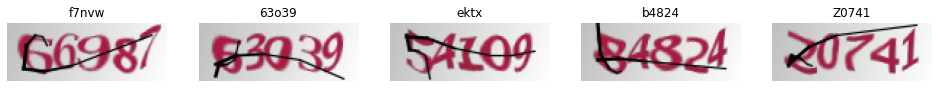

In [52]:
plt.figure(figsize = (20,2))
strange_data = data[(data[1].str.isnumeric()==False)|()]
# for num, i in enumerate(list(strange_data[0].values)):
num = 0 
for index, row in strange_data.iterrows():
    num+=1
    img = PIL.Image.open(os.path.join('test-task-data', str(row[0])+'.jpg'))
    plt.subplot(1,6,num+1)
    plt.title(row[1])
    plt.axis('off')
    plt.imshow(img) 

Видно, что на 1й и 3й и 4й картинке ошибки (на 1й и 3й вообще не то написано, а на 4й нарисована "8", а написано "b")
а на 2й и 5й используются буквы o и z, которые и не каждый человек отличит от нуля и двойки, так что все-таки наш датасет все-таки состоит целиком из чисел

In [53]:
data['len'] = data.apply(lambda x: len(x[1]), axis=1)

In [54]:
data['len'].min()

4

In [6]:
data[data['len']==6]

,0,1,len
13873,13878,470115,6


Один пример с 6ю символами не поможет при обучении

In [ ]:
#удалим плохие примеры за ненадобностью
os.chdir('test-task-data')
for i in strange_paths:
    os.remove(str(i)+'.jpg')
os.chdir('../')